#Дудник М. В. ИУ5-22М РК1 ММО


**Задача №5.**
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".
**Задача №25.**
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе межквартильного размаха.

Для студентов групп ИУ5-22М, ИУ5И-22М - для произвольной колонки данных построить гистограмму.

##Задача 1

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder

# Load the Titanic dataset
titanic = fetch_openml('titanic', version=1, as_frame=True)
titanic_df = titanic.frame

# Display the first few rows of the dataset
print(titanic_df.head())

# One-Hot Encoding for a categorical feature
# Let's choose the 'embarked' column for this task

# Set the categories for 'embarked' column including 'missing'
titanic_df['embarked'] = titanic_df['embarked'].astype('category')
titanic_df['embarked'] = titanic_df['embarked'].cat.add_categories('missing')

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the 'embarked' column
embarked_encoded = encoder.fit_transform(titanic_df[['embarked']].fillna('missing'))

# Create a DataFrame with the encoded feature
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['embarked']))

# Drop the original 'embarked' column and concatenate the encoded DataFrame
titanic_encoded_df = titanic_df.drop('embarked', axis=1).join(embarked_encoded_df)

# Display the first few rows of the encoded DataFrame
print(titanic_encoded_df.head())

# Detecting and removing outliers for a numerical feature
# Let's choose the 'age' column for this task

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = titanic_df['age'].quantile(0.25)
Q3 = titanic_df['age'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
titanic_no_outliers_df = titanic_df[(titanic_df['age'] >= lower_bound) & (titanic_df['age'] <= upper_bound)]

# Display the shape of the DataFrame without outliers
print(titanic_no_outliers_df.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   pclass survived                                             name     sex  \
0     1.0        1                    Allen, Miss. Elisabeth Walton  female   
1     1.0        1                   Allison, Master. Hudson Trevor    male   
2     1.0        0                     Allison, Miss. Helen Loraine  female   
3     1.0        0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S     2   None   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S    11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  None  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   

                         home.dest  
0                     St 

##Задача 2


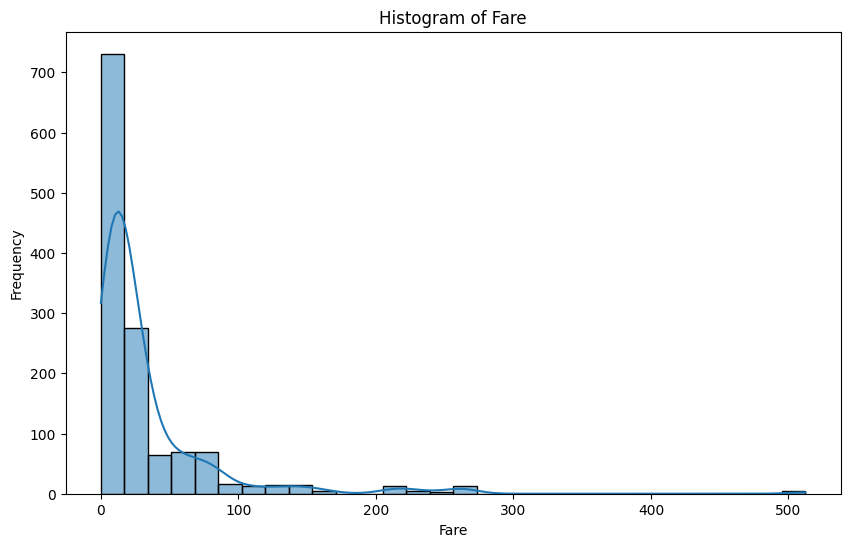

In [6]:
# Plotting a histogram for a numerical column
# Let's choose the 'fare' column for this task

plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['fare'], bins=30, kde=True)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()